<a href="https://colab.research.google.com/github/saerarawas/AAI614_rawas/blob/main/Week%206/Notebook6_5_Rawas_Saera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 6.5: Experiment with PCA*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%206/Notebook6.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Source: This notebook contains an amanded excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas*

In [ ]:
from packaging import version
import sklearn
import matplotlib

assert version.parse(matplotlib.__version__) >= version.parse("3.7.3")

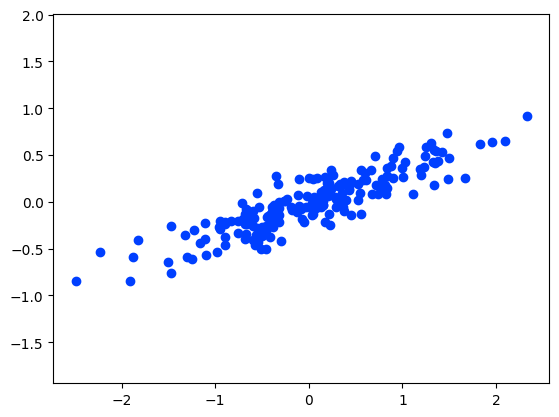

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=5)

PCA(n_components=5)

In [ ]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


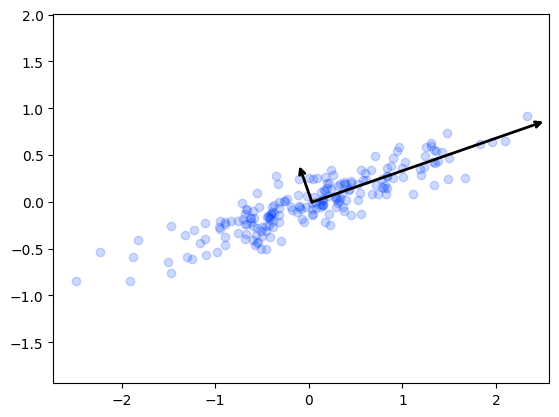

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


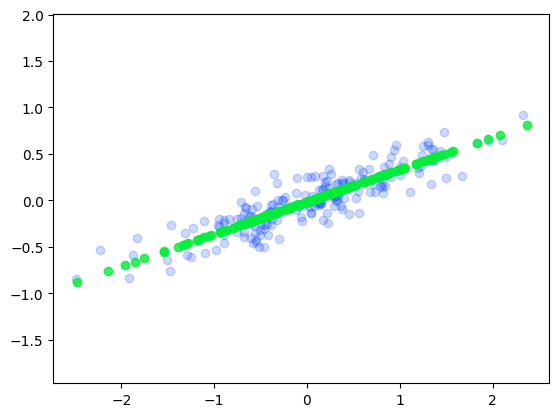

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


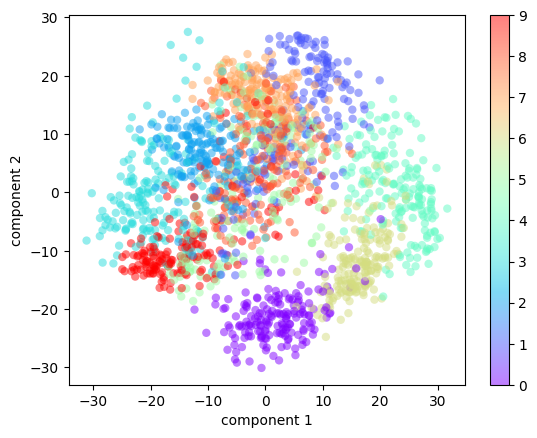

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=matplotlib.colormaps.get_cmap('rainbow'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

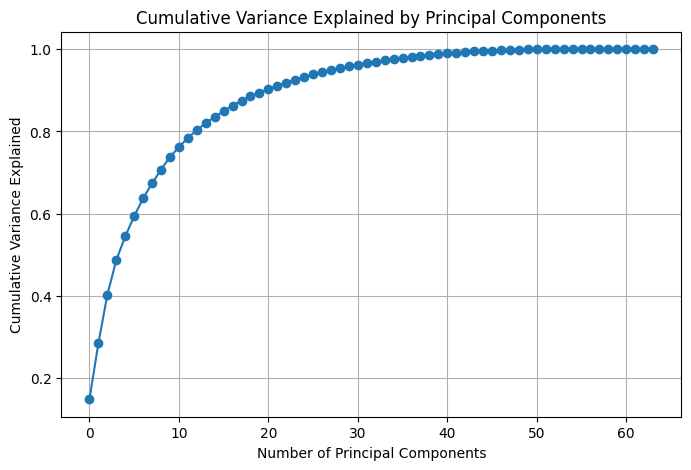

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

# Load the digits dataset
digits = load_digits()

# Fit PCA on the digits dataset
pca = PCA()
pca.fit(digits.data)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative variance ratio
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()


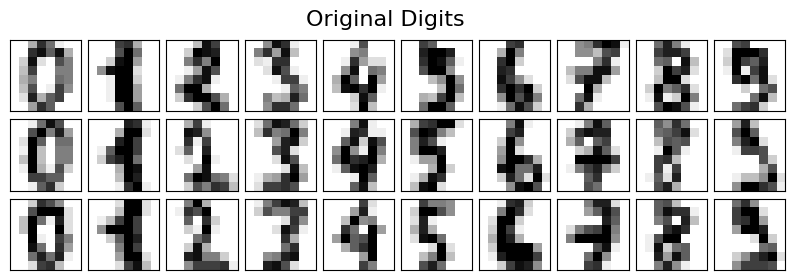

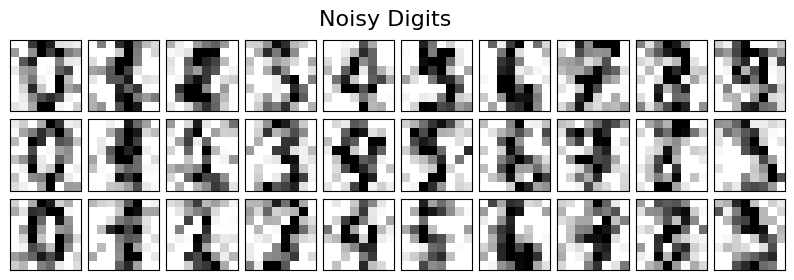

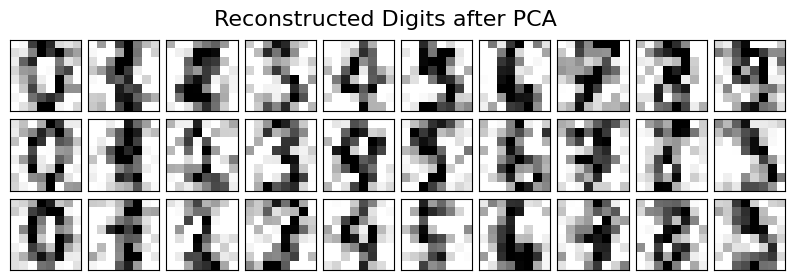

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Add noise to the dataset
noisy_digits = digits.data + np.random.normal(0, 4, digits.data.shape)

# Apply PCA to noisy data and retain enough components to explain 95% variance
pca = PCA(0.95)
projected_noisy = pca.fit_transform(noisy_digits)
reconstructed_noisy = pca.inverse_transform(projected_noisy)

# Function to plot digits
def plot_digits(data, title, n_col=10):
    fig, axes = plt.subplots(3, n_col, figsize=(n_col, 3),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle(title, fontsize=16)
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))

# Plot original, noisy, and reconstructed digits
plot_digits(digits.data, "Original Digits")
plot_digits(noisy_digits, "Noisy Digits")
plot_digits(reconstructed_noisy, "Reconstructed Digits after PCA")
plt.show()


Number of components: 2, Accuracy: 0.6472
Number of components: 10, Accuracy: 0.9333
Number of components: 20, Accuracy: 0.9528
Number of components: 40, Accuracy: 0.9722
Number of components: 64, Accuracy: 0.9722


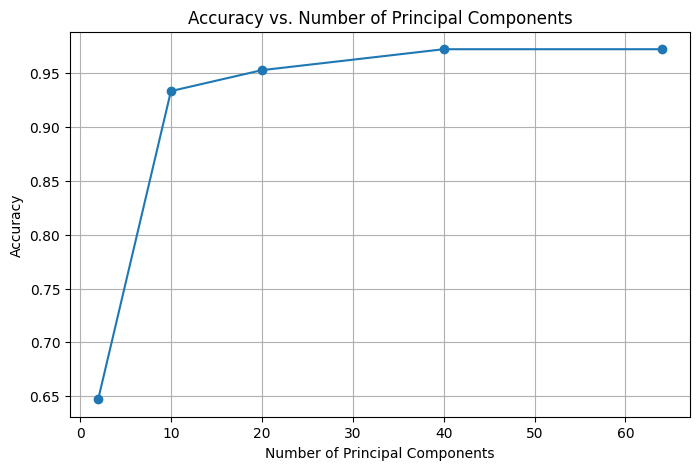

In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Apply PCA with different numbers of components
components = [2, 10, 20, 40, 64]
accuracies = []

for n_components in components:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train a logistic regression model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Number of components: {n_components}, Accuracy: {accuracy:.4f}')

# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.plot(components, accuracies, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components')
plt.grid(True)
plt.show()
